In [41]:
import graphviz

dot = graphviz.Digraph("test", format = "svg", graph_attr = {'rankdir': 'LR'})
dot.node("thing 1", "hello world!")
dot.node("thing 2", "my name is paul!")
dot.edge("thing 1", "thing 2")


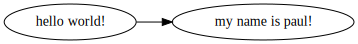

In [42]:
dot

In [43]:
import collections
import tiktoken
import functools

def convertINT16To2Chr(input): #could be replaced with bit shifting.  probably faster w/ bit shifts?
    output = ""
    buffer1 = int(input / 256)
    buffer2 = input - (buffer1 * 256)
    output = [chr(buffer1), chr(buffer2)]
    return(output)

text = open("Dracula.txt", 'r')
testOutput = open("compressionTest.txt", 'w')
tokenizer = tiktoken.get_encoding('gpt2')
singleStringText = text.read()
buffer = singleStringText.split(" ")
splits = list(map(lambda x: ' '.join(buffer[x:x+100]), range(0, len(buffer), 100)))
tokenSets = list(map(lambda x: tokenizer.encode(x), splits))
allTokens = list(functools.reduce(lambda x, y: x + y, tokenSets, []))
inputFileSize = len(singleStringText)
tokenCount = len(allTokens)
dataVolume = tokenCount * 2
estimatedMinFileSize = tokenCount * (tokenizer.n_vocab / (2**16)) * 2
frequencies = dict(collections.Counter(allTokens))
distinctTokenCount = len(frequencies)
commonElements = dict(filter(lambda x: x[1] > 32, frequencies.items()))
uncommonElements = dict(filter(lambda x: x[1] < 32, frequencies.items()))
topElementsSum = functools.reduce(lambda x, y: x + y[1], commonElements.items(), 0)
bottomElementsSum = functools.reduce(lambda x, y: x + y[1], uncommonElements.items(), 0)
tokenConversionBuffer = list(map(lambda x: convertINT16To2Chr(x), allTokens))
convertedTokens = list(functools.reduce(lambda x, y: x + [y[0], y[1]], tokenConversionBuffer))

topElementsCount = len(commonElements)
bottomElementsCount = len(uncommonElements)
topElementsSumProp = topElementsSum / tokenCount
bottomElementsSumProp = bottomElementsSum / tokenCount
topElementsCountProp = topElementsCount / distinctTokenCount
bottomElementsCountProp = bottomElementsCount / distinctTokenCount

stats = {
    'input file size': str(inputFileSize) + "B",
    'token count': tokenCount,
    'tokenized data volume': str(dataVolume) + "B",
    'estimated minimum file size': str(estimatedMinFileSize) + "B",
    'distinct token count': distinctTokenCount,
    'top elements total / proportion of tokens': (topElementsSum, topElementsSumProp),
    'bottom elements total  / proportion of tokens': (bottomElementsSum, bottomElementsSumProp),
    'top elements distinct count / proportion of distinct tokens': (topElementsCount, topElementsCountProp),
    'bottom elements count / proportion of distinct tokens': (bottomElementsCount, bottomElementsCountProp)
}

print(stats)



{'input file size': '842647B', 'token count': 230417, 'tokenized data volume': '460834B', 'estimated minimum file size': '353395.6045227051B', 'distinct token count': 11196, 'top elements total / proportion of tokens': (183437, 0.7961087940559941), 'bottom elements total  / proportion of tokens': (46148, 0.2002803612580669), 'top elements distinct count / proportion of distinct tokens': (672, 0.06002143622722401), 'bottom elements count / proportion of distinct tokens': (10498, 0.9376563058235085)}


In [31]:
x = 2534
y = int(x / 256)
a = y * 256
b = x - a
print(y, b)
print(chr(y), chr(b))

9 230
	 æ


In [32]:
for i in range(0, 255):
    print(chr(i))

 








	























 
!
"
#
$
%
&
'
(
)
*
+
,
-
.
/
0
1
2
3
4
5
6
7
8
9
:
;
<
=
>
?
@
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
[
\
]
^
_
`
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
{
|
}
~

































 
¡
¢
£
¤
¥
¦
§
¨
©
ª
«
¬
­
®
¯
°
±
²
³
´
µ
¶
·
¸
¹
º
»
¼
½
¾
¿
À
Á
Â
Ã
Ä
Å
Æ
Ç
È
É
Ê
Ë
Ì
Í
Î
Ï
Ð
Ñ
Ò
Ó
Ô
Õ
Ö
×
Ø
Ù
Ú
Û
Ü
Ý
Þ
ß
à
á
â
ã
ä
å
æ
ç
è
é
ê
ë
ì
í
î
ï
ð
ñ
ò
ó
ô
õ
ö
÷
ø
ù
ú
û
ü
ý
þ
